In [0]:
import fastai
from fastai.vision import *
import pandas as pd
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from pathlib import Path
from google.colab import drive
import csv
import glob

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path_to_folder = 'gdrive/My Drive/Dataset/The Picnic Hackathon 2019/'
df = pd.read_csv(path_to_folder + "train.tsv",  sep='\t')

In [0]:
pathTrain = Path("gdrive/My Drive/train/")

In [0]:
bunch = ImageDataBunch.from_df(pathTrain, df, size=224)

In [7]:
bunch.normalize()

ImageDataBunch;

Train: LabelList (5807 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bananas, apples & pears,Berries & cherries,Pork, beef & lamb,Berries & cherries,Bell peppers, zucchinis & eggplants
Path: gdrive/My Drive/train;

Valid: LabelList (1451 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Milk,Pre-baked breads,Pork, beef & lamb,Cheese,Salad & cress
Path: gdrive/My Drive/train;

Test: None

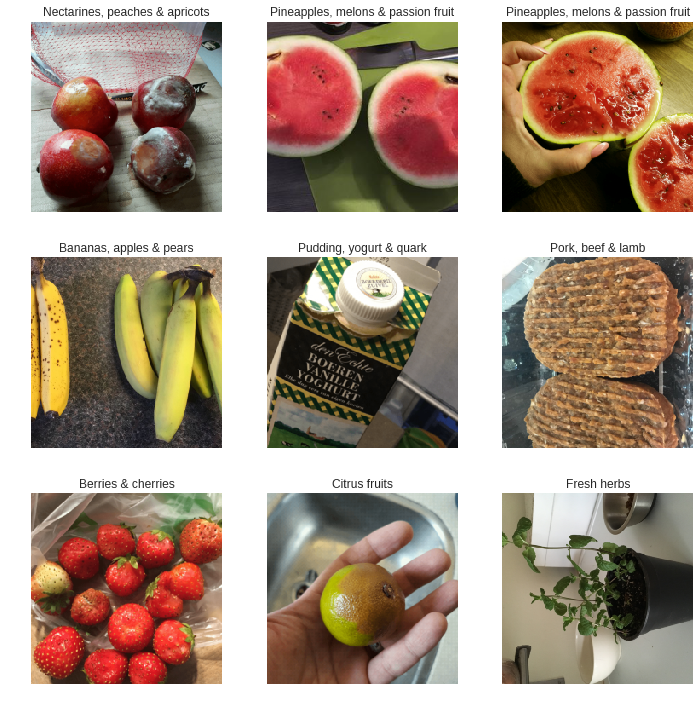

In [8]:
bunch.show_batch(rows=3, figsize=(10,10))

In [9]:
learn = create_cnn(bunch, models.resnet50, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 76926723.55it/s]


In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.887844,1.088012,0.686423,40:38
1,1.110123,0.872544,0.740179,08:29
2,0.822998,0.805207,0.777395,08:13
3,0.614685,0.734206,0.780152,08:18
4,0.437331,0.748067,0.796692,08:23
5,0.300484,0.703069,0.802205,08:24
6,0.209106,0.730552,0.800827,08:26
7,0.124088,0.729556,0.812543,08:27
8,0.086490,0.728308,0.815989,08:24


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

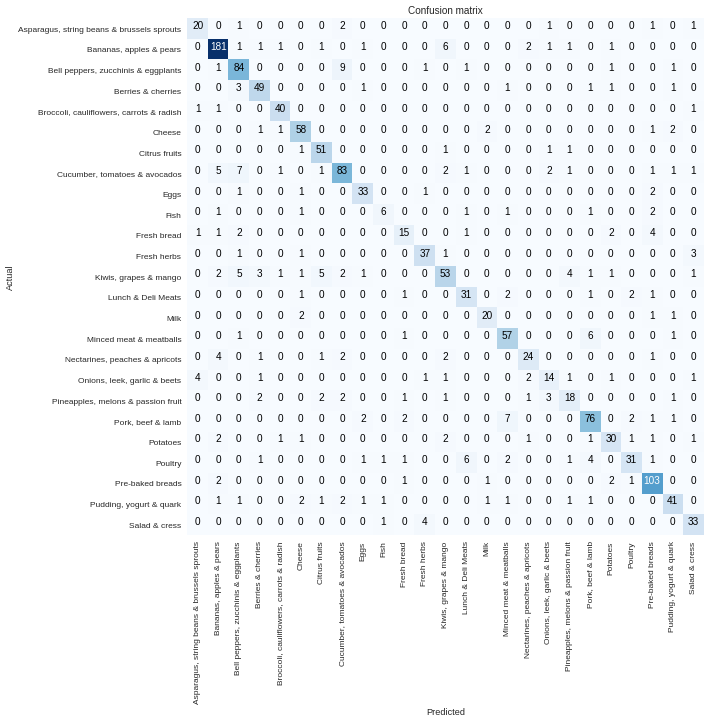

In [38]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
cm = interp.confusion_matrix()

In [0]:
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
num_classes = 25
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
precision = TP/(TP+FP)
recall = TP/(TP+FN)

In [0]:
F1 = 2 * (precision.mean() * recall.mean()) / (precision.mean() + recall.mean())

In [42]:
F1

0.7845275996659974

In [0]:
learn.save('hello')

In [0]:
files = glob.glob(path_to_folder + 'test/*')

In [0]:
results = []
i = 0
for file in files:
    print(i)
    i+=1
    img = open_image(Path(file))
    #img = cv2.resize(img, (224, 224))
    #img = img/255
    cat, idx, out = learn.predict(img)
    # label = labels[np.argmax(result)]
    filename = os.path.basename(file)
    results.append([filename, str(cat)])

In [0]:
headers = ['file', 'label']
df = pd.DataFrame(results, columns=headers)

In [0]:
df = df.sort_values(['file'])

In [47]:
true = pd.read_excel('test_5.xlsx')
arr = true.iloc[:,1].values
arr2 = df.iloc[:,1].values
(arr == arr2).mean()

0.7695121951219512

In [48]:
from sklearn.metrics import f1_score
nn = pd.merge(df.iloc[:,[0,1]],true.iloc[:,[0,1]] ,on = 'file')
nn.isnull().sum()
nn.head()
r = nn.dropna(axis = 0)
y_a = r.iloc[:,1].values
y_b = r.iloc[:,2].values
f1_score(y_a, y_b, average = 'macro')

0.7436870218399608